## Step 5 : Train test split

divide the data into training and testing data
dataset => 70%-80% training ... 20%-30% testing
test_size = 0.2, 0.3

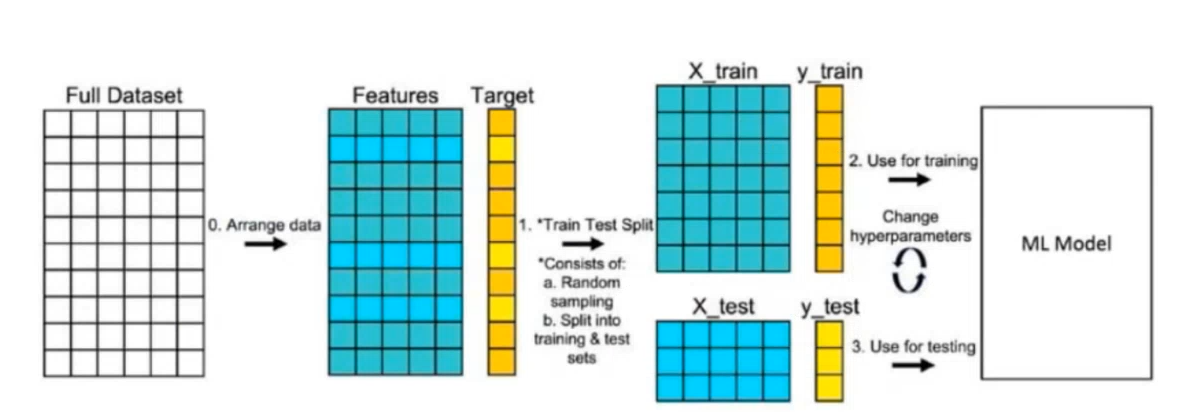

![Screenshot 2025-02-21 163334.png](<attachment:Screenshot 2025-02-21 163334.png>)
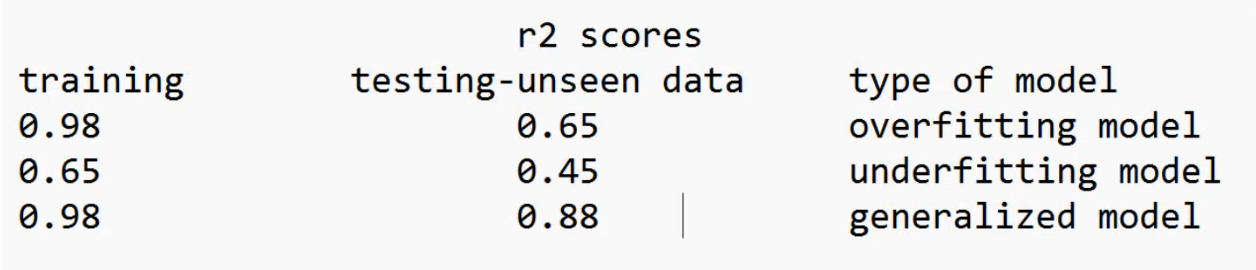